c:\Users\dhaks\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


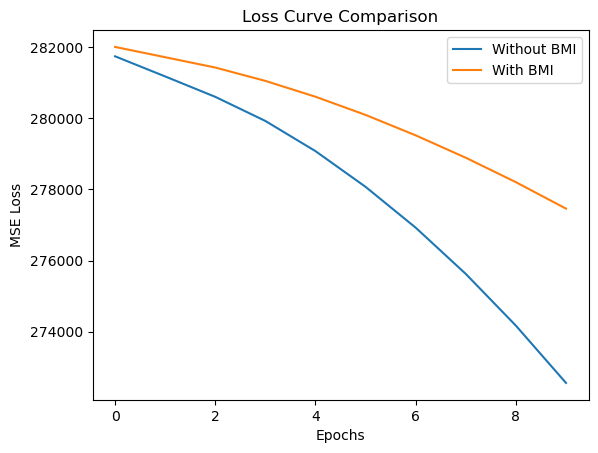

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

np.random.seed(42)
n_samples = 500
height = np.random.uniform(1.5, 2.0, n_samples) 
weight = np.random.uniform(50, 100, n_samples) 
age = np.random.uniform(20, 60, n_samples)  
smoking = np.random.randint(0, 2, n_samples) 

BMI = weight / (height ** 2)
premium = 300 + 2 * weight - 5 * age + 50 * smoking + 10 * BMI + np.random.normal(0, 10, n_samples)

X_no_bmi = np.column_stack((height, weight, age, smoking))
X_with_bmi = np.column_stack((height, weight, age, smoking, BMI))
y = premium.reshape(-1, 1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_no_bmi = scaler.fit_transform(X_no_bmi)
X_with_bmi = scaler.fit_transform(X_with_bmi)

def build_model(input_shape):
    model = keras.Sequential([
        layers.Dense(2, activation='relu', input_shape=(input_shape,)),
        layers.Dense(1)
    ])
    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.01), loss='mse')
    return model

model_no_bmi = build_model(X_no_bmi.shape[1])
history_no_bmi = model_no_bmi.fit(X_no_bmi, y, epochs=10, batch_size=32, verbose=0)

model_with_bmi = build_model(X_with_bmi.shape[1])
history_with_bmi = model_with_bmi.fit(X_with_bmi, y, epochs=10, batch_size=32, verbose=0)

plt.plot(history_no_bmi.history['loss'], label='Without BMI')
plt.plot(history_with_bmi.history['loss'], label='With BMI')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Loss Curve Comparison')
plt.show()
